# Bài tập

Sử dụng 1 bộ dữ liệu time-series bất kì (1 biến hoặc nhiều biến).
tại link (https://github.com/thieu1995/csv-files/).

Chọn một model regression bất kì trên scikit-learn (https://scikit-learn.org/stable/search.html?q=regression)

Áp dụng các kĩ thuật trên lớp vào bộ dữ liệu time-series trên.

1. Scaling, (1 điểm)

2. Building, (1 điểm)

3. Hyper-parameter tuning, (2 điểm)

4. Pipeline, (1 điểm)

5. GridsearchCV, (1 điểm)

6. Forecasting, (1 điểm)

7. Calculate Metrics ví dụ như RMSE, MSE, MAE, MAPE (2 điểm)

8. Vẽ đồ thị giá trị thực tế và dự đoán (1 điểm)



In [1]:
import pandas as pd
import numpy as np

In [75]:
data=pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/univariate/acea-water-prediction/River_Arno.csv')



In [76]:
data

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,26/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,27/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,28/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,29/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19


In [77]:
data.columns

Index(['Date', 'Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze',
       'Hydrometry_Nave_di_Rosano'],
      dtype='object')

In [78]:
data=data.loc[:,['Date','Hydrometry_Nave_di_Rosano']]

In [79]:
data

,Date,Hydrometry_Nave_di_Rosano
0,01/01/1998,1.82
1,02/01/1998,1.94
2,03/01/1998,2.11
3,04/01/1998,1.84
4,05/01/1998,1.88
...,...,...
8212,26/06/2020,1.34
8213,27/06/2020,1.21
8214,28/06/2020,1.30
8215,29/06/2020,1.19


In [80]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)


In [81]:

data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month

data['day'] = data.Date.dt.day


In [82]:
data

,Date,Hydrometry_Nave_di_Rosano,year,month,day
0,1998-01-01,1.82,1998,1,1
1,1998-01-02,1.94,1998,1,2
2,1998-01-03,2.11,1998,1,3
3,1998-01-04,1.84,1998,1,4
4,1998-01-05,1.88,1998,1,5
...,...,...,...,...,...
8212,2020-06-26,1.34,2020,6,26
8213,2020-06-27,1.21,2020,6,27
8214,2020-06-28,1.30,2020,6,28
8215,2020-06-29,1.19,2020,6,29


In [87]:
df = data.copy()

dataset = pd.DataFrame(df['Hydrometry_Nave_di_Rosano'])

In [88]:
dataset

,Hydrometry_Nave_di_Rosano
0,1.82
1,1.94
2,2.11
3,1.84
4,1.88
...,...
8212,1.34
8213,1.21
8214,1.30
8215,1.19


In [99]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()


	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	agg = pd.concat(cols, axis=1)
	agg.columns = names

	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [112]:
data = series_to_supervised(dataset, n_in=5, n_out=1)
print(data)

      var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)  var1(t)
5          1.82       1.94       2.11       1.84       1.88     1.79
6          1.94       2.11       1.84       1.88       1.79     1.77
7          2.11       1.84       1.88       1.79       1.77     1.83
8          1.84       1.88       1.79       1.77       1.83     1.82
9          1.88       1.79       1.77       1.83       1.82     1.63
...         ...        ...        ...        ...        ...      ...
8212       1.37       1.41       1.38       1.33       1.35     1.34
8213       1.41       1.38       1.33       1.35       1.34     1.21
8214       1.38       1.33       1.35       1.34       1.21     1.30
8215       1.33       1.35       1.34       1.21       1.30     1.19
8216       1.35       1.34       1.21       1.30       1.19     1.30

[8124 rows x 6 columns]


In [113]:
data

,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
5,1.82,1.94,2.11,1.84,1.88,1.79
6,1.94,2.11,1.84,1.88,1.79,1.77
7,2.11,1.84,1.88,1.79,1.77,1.83
8,1.84,1.88,1.79,1.77,1.83,1.82
9,1.88,1.79,1.77,1.83,1.82,1.63
...,...,...,...,...,...,...
8212,1.37,1.41,1.38,1.33,1.35,1.34
8213,1.41,1.38,1.33,1.35,1.34,1.21
8214,1.38,1.33,1.35,1.34,1.21,1.30
8215,1.33,1.35,1.34,1.21,1.30,1.19


In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [130]:
def calculate_metrics(y_true, y_pred):

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R-squared (R2): {r2}")

In [131]:
import matplotlib.pyplot as plt

def draw_true_predict(y_true, y_pred):

    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='True Values', color='blue')
    plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()



      var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)
5          1.82       1.94       2.11       1.84       1.88
6          1.94       2.11       1.84       1.88       1.79
7          2.11       1.84       1.88       1.79       1.77
8          1.84       1.88       1.79       1.77       1.83
9          1.88       1.79       1.77       1.83       1.82
...         ...        ...        ...        ...        ...
8212       1.37       1.41       1.38       1.33       1.35
8213       1.41       1.38       1.33       1.35       1.34
8214       1.38       1.33       1.35       1.34       1.21
8215       1.33       1.35       1.34       1.21       1.30
8216       1.35       1.34       1.21       1.30       1.19

[8124 rows x 5 columns] 5       1.79
6       1.77
7       1.83
8       1.82
9       1.63
        ... 
8212    1.34
8213    1.21
8214    1.30
8215    1.19
8216    1.30
Name: var1(t), Length: 8124, dtype: float64


<ipython-input-132-9230eec857d9>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train_scaled, Y_train_scaled)
<ipython-input-130-283be8c166ad>:15: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Mean Squared Error (MSE): 0.08966214715719587
Root Mean Squared Error (RMSE): 0.29943638248749244
Mean Absolute Error (MAE): 0.142583962800325
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.7561611070339772


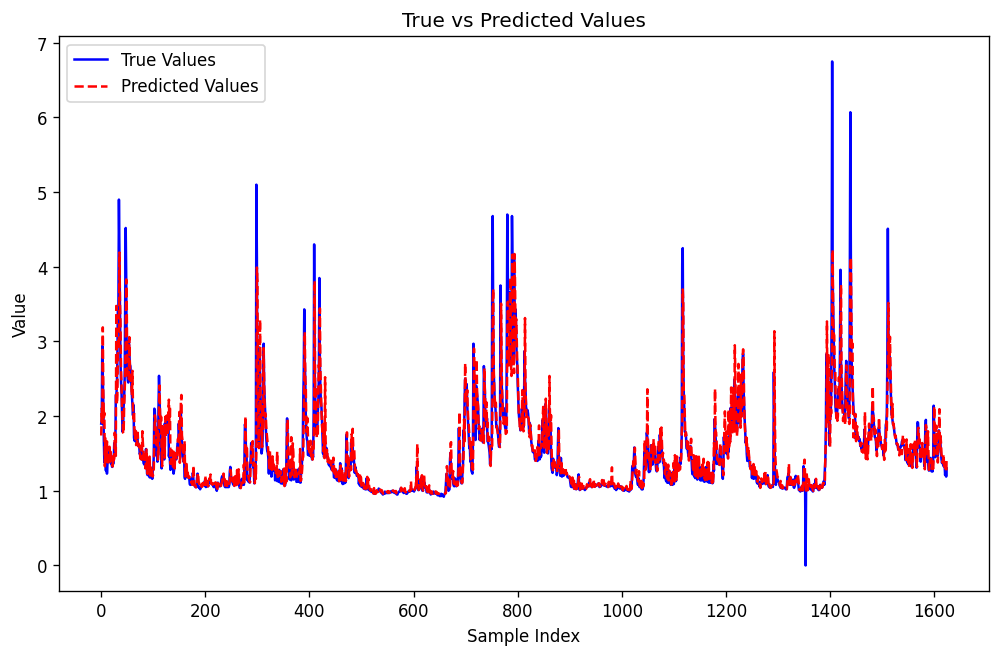

In [132]:

X, Y = data[['var1(t-5)','var1(t-4)','var1(t-3)', 'var1(t-2)', 'var1(t-1)']], data['var1(t)']
print(X, Y)
X = X.values
Y = Y.values


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)
Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

scaler_feature = StandardScaler()
scaler_feature.fit(X_train)
X_train_scaled = scaler_feature.transform(X_train)
X_test_scaled = scaler_feature.transform(X_test)

scaler_label = StandardScaler()
scaler_label.fit(Y_train)
Y_train_scaled = scaler_label.transform(Y_train)
Y_test_scaled = scaler_label.transform(Y_test)


estimator = RandomForestRegressor()


estimator.fit(X_train_scaled, Y_train_scaled)


y_pred = estimator.predict(X_test_scaled)
y_pred_unscaled = scaler_label.inverse_transform(np.reshape(y_pred, (-1, 1)))


calculate_metrics(Y_test, y_pred_unscaled)

draw_true_predict(Y_test, y_pred_unscaled)

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [134]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [135]:
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0],
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
}

In [136]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

<ipython-input-130-283be8c166ad>:15: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Mean Squared Error (MSE): 0.9244572074014294
Root Mean Squared Error (RMSE): 0.9614869772396449
Mean Absolute Error (MAE): 0.9322902164344647
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): -1.514089046429159


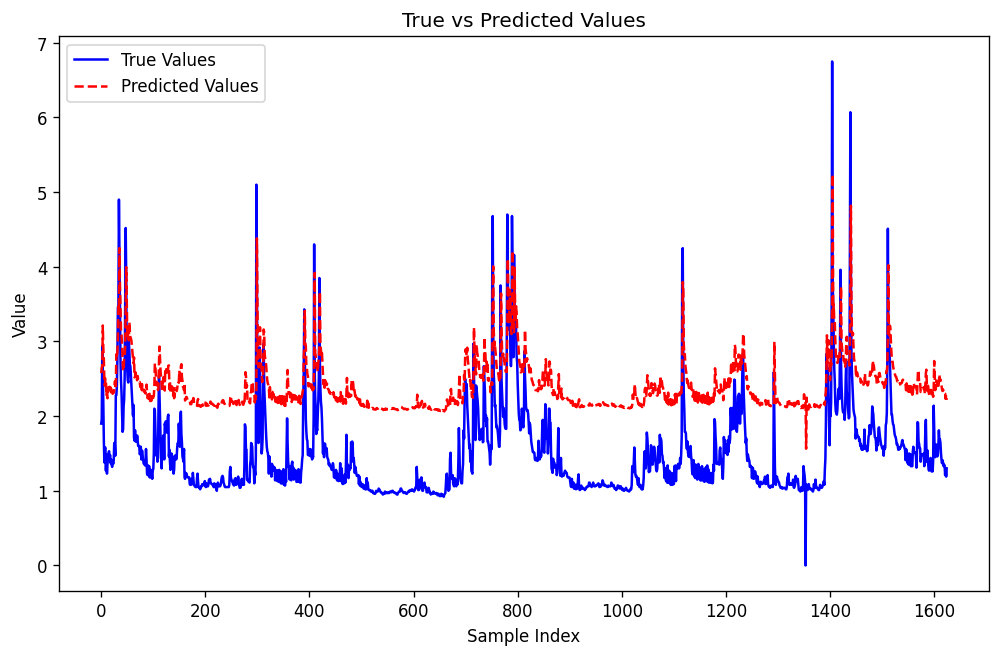

In [137]:
y_pred = best_model.predict(X_test)


y_pred_unscaled = scaler_label.inverse_transform(np.reshape(y_pred, (-1, 1)))

calculate_metrics(Y_test, y_pred_unscaled)

draw_true_predict(Y_test, y_pred_unscaled)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
<ipython-input-130-283be8c166ad>:15: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Mean Squared Error (MSE): 0.08331460972520907
Root Mean Squared Error (RMSE): 0.28864270253240265
Mean Absolute Error (MAE): 0.13334967343865536
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.7734234250750842


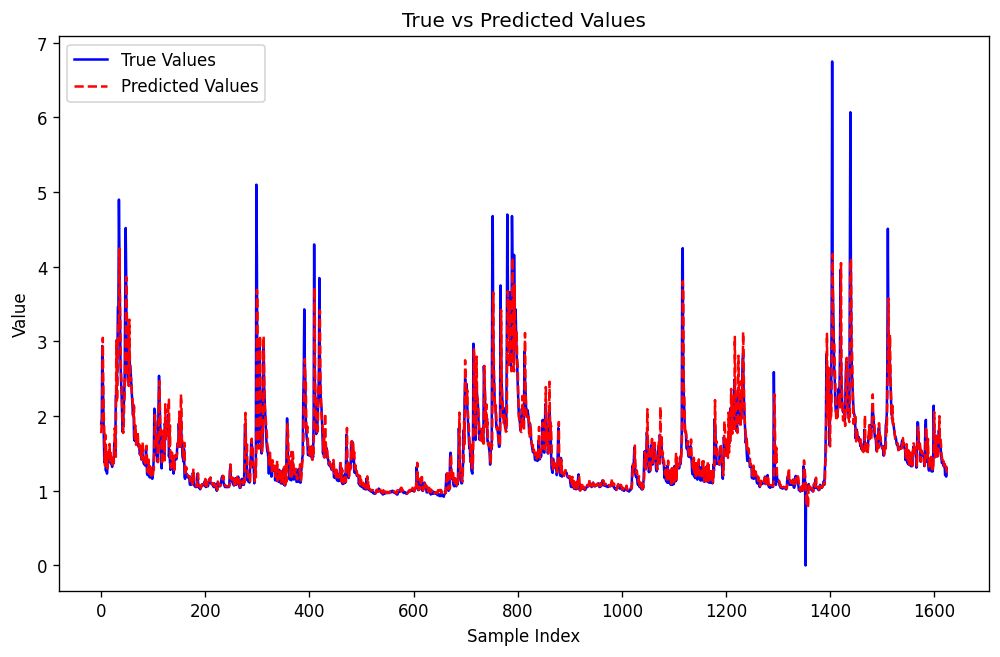

In [139]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

calculate_metrics(Y_test, y_pred)
draw_true_predict(Y_test, y_pred)